# 1. Importing Libraries and dataset

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
df=pd.read_excel('glass.xlsx',sheet_name='glass')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0


In [3]:
df.shape

(214, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    float64
dtypes: float64(10)
memory usage: 16.8 KB


In [5]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [6]:
#checking Missing Values
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
#checking Duplicate Values
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
209    False
210    False
211    False
212    False
213    False
Length: 214, dtype: bool

In [8]:
df[df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1.0


In [9]:
df.drop_duplicates(inplace=True)

<AxesSubplot:>

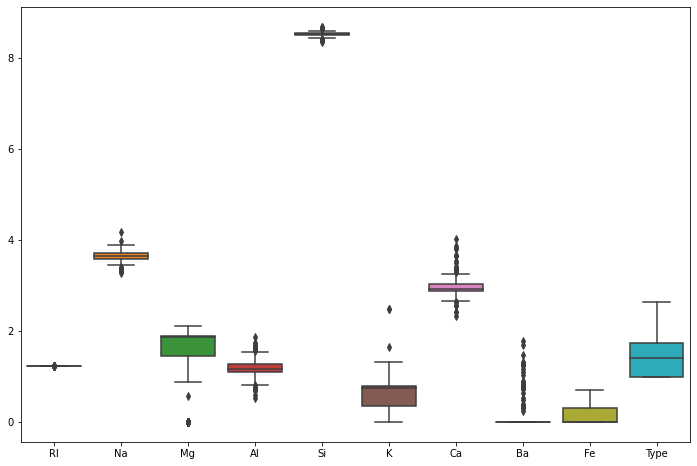

In [10]:
# Creating boxplot for all the features
plt.figure(figsize=(12,8))
sns.boxplot(data=np.sqrt(df))

<AxesSubplot:xlabel='Fe', ylabel='Count'>

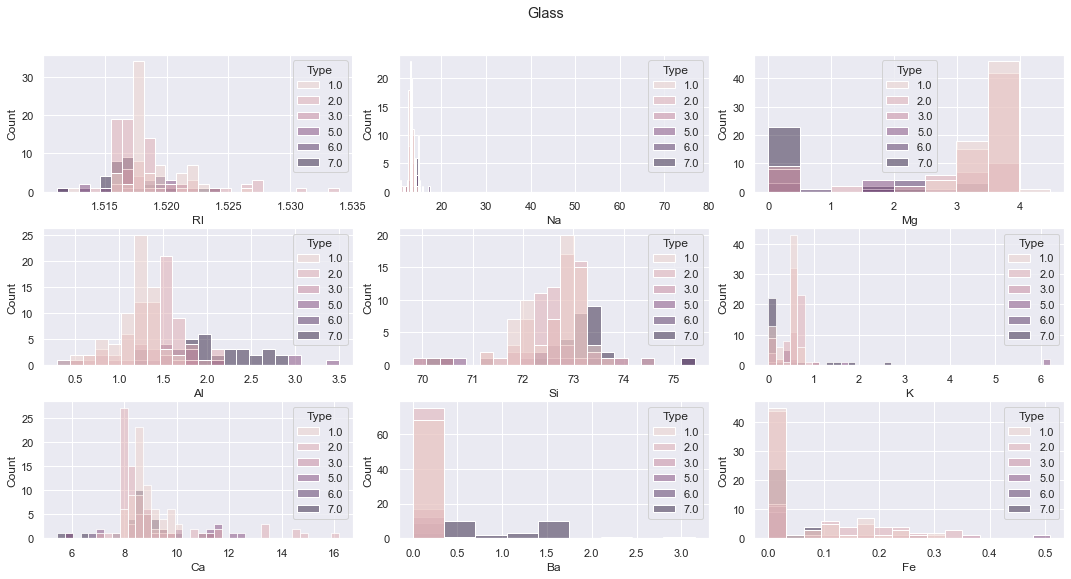

In [11]:
# Creating histograms for all the features
sns.set(style= 'darkgrid')
fig,axe = plt.subplots(3,3, figsize=(15,8))
plt.suptitle('Glass\n')
plt.tight_layout()
sns.histplot(data =df, x='RI',hue='Type',ax=axe[0,0])
sns.histplot(data = df,x='Na',hue='Type',ax=axe[0,1]).set_xticks(np.arange(20, 90, 10))
sns.histplot(data=df,x='Mg',hue='Type',ax=axe[0,2])
sns.histplot(data=df,x='Al',hue='Type',ax=axe[1,0])
sns.histplot(data=df,x='Si',hue='Type',ax=axe[1,1])
sns.histplot(data=df,x='K',hue='Type',ax=axe[1,2])
sns.histplot(data=df,x='Ca',hue='Type',ax=axe[2,0])
sns.histplot(data=df,x='Ba',hue='Type',ax=axe[2,1])
sns.histplot(data=df,x='Fe',hue='Type',ax=axe[2,2])

Text(0.5, 1.0, 'Count of Glass Types')

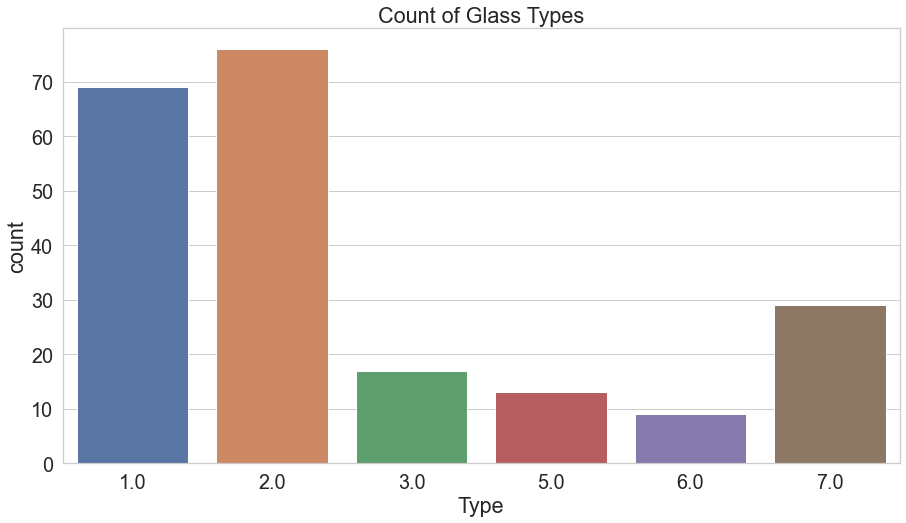

In [12]:
# Creating countplot for target variable
sns.set(style="whitegrid", font_scale=1.8)
plt.subplots(figsize = (15,8))
sns.countplot('Type',data=df).set_title('Count of Glass Types')

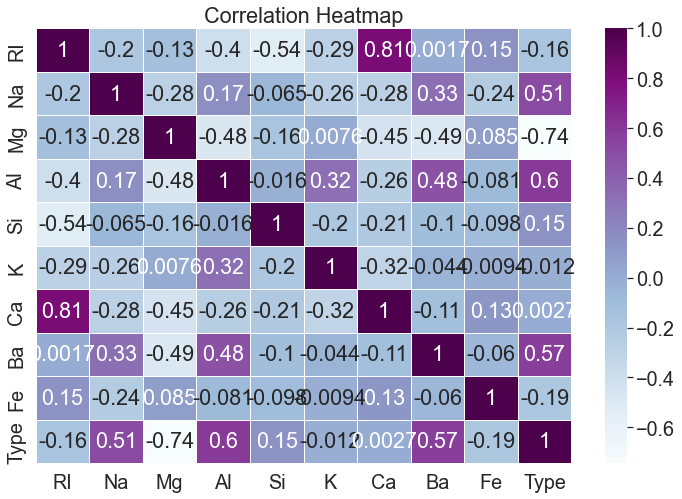

In [13]:
# Generate a correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='BuPu', annot=True,linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Unique points in this correlation matrix:

RI is positively correlated with Ca.

NA and Ba is positively correlated with Type.

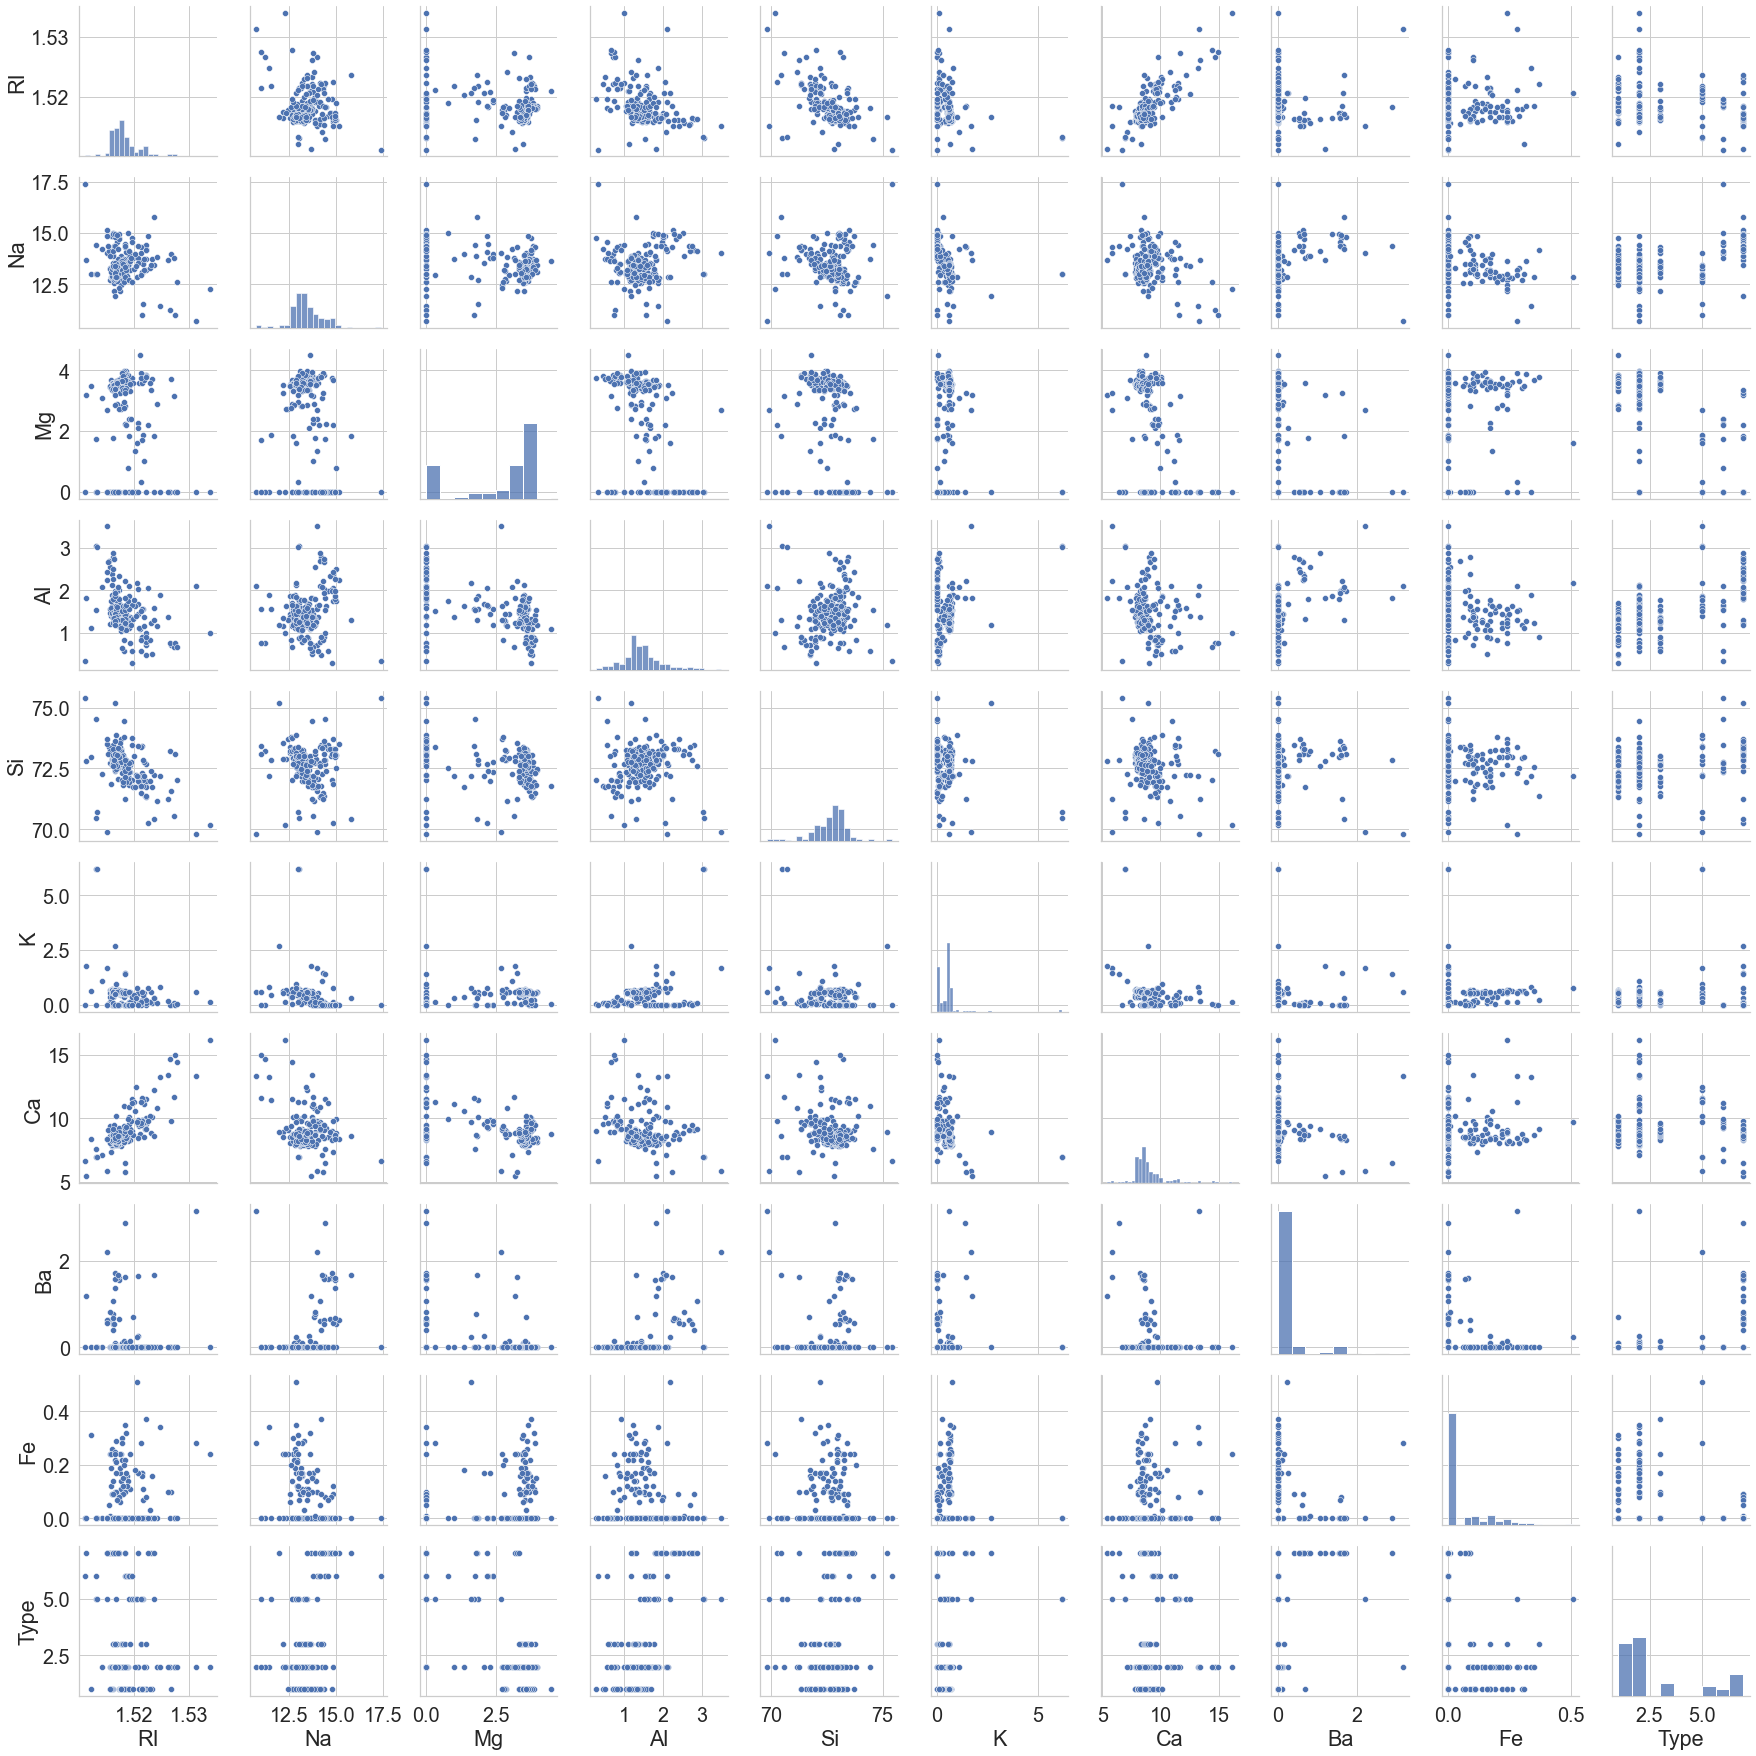

In [14]:
sns.pairplot(df)

# Data Preprocessing

# Standardizing the Data

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_data 

array([[ 0.87984017,  0.28955813,  1.25723832, ..., -0.35380764,
        -0.58830108, -0.85170346],
       [-0.24381562,  0.59640332,  0.63931074, ..., -0.35380764,
        -0.58830108, -0.85170346],
       [-0.71641202,  0.15454625,  0.6045957 , ..., -0.35380764,
        -0.58830108, -0.85170346],
       ...,
       [ 0.76086485,  1.17327228, -1.86017161, ...,  2.94550057,
        -0.58830108,  2.0051916 ],
       [-0.60735132,  1.19781989, -1.86017161, ...,  2.80467644,
        -0.58830108,  2.0051916 ],
       [-0.40905912,  1.01371278, -1.86017161, ...,  3.00585377,
        -0.58830108,  2.0051916 ]])

## Train Test Split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X=df.iloc[:,0:9]
y=df.iloc[:,9]

In [19]:
X.head(2)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0


In [20]:
y.head(2)

0    1.0
1    1.0
Name: Type, dtype: float64

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((170, 9), (43, 9), (170,), (43,))

## Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [23]:
ens_rf = RandomForestClassifier(n_estimators=100, max_depth=8)

In [24]:
ens_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=8)

In [25]:
y_pred = ens_rf.predict(X_test)
y_pred

array([2., 1., 1., 5., 2., 2., 1., 2., 1., 1., 2., 1., 5., 1., 7., 6., 5.,
       2., 1., 7., 7., 2., 1., 1., 2., 7., 2., 1., 2., 1., 1., 1., 3., 2.,
       2., 1., 1., 1., 1., 1., 6., 2., 1.])

In [26]:
print(confusion_matrix(y_test,y_pred))

[[13  1  0  0  0  0]
 [ 3 11  0  0  0  1]
 [ 4  0  1  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  3]]


In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.65      0.93      0.76        14
         2.0       0.85      0.73      0.79        15
         3.0       1.00      0.20      0.33         5
         5.0       1.00      0.75      0.86         4
         6.0       1.00      1.00      1.00         2
         7.0       0.75      1.00      0.86         3

    accuracy                           0.77        43
   macro avg       0.87      0.77      0.77        43
weighted avg       0.81      0.77      0.75        43



In [28]:
as1=accuracy_score(y_test,y_pred)
as1

0.7674418604651163

## Bagging Model

In [31]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [32]:
base_model = DecisionTreeClassifier(max_depth=8, criterion='entropy')
ens_bagg = BaggingClassifier(estimator=base_model, n_estimators=100)   

In [33]:
ens_bagg.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                   max_depth=8),
                  n_estimators=100)

In [34]:
y_pred_bagg = ens_bagg.predict(X_test)
y_pred_bagg

array([2., 1., 1., 5., 2., 2., 1., 2., 1., 1., 6., 1., 5., 3., 7., 6., 5.,
       2., 1., 7., 7., 2., 1., 1., 2., 7., 2., 1., 2., 1., 1., 1., 3., 2.,
       1., 2., 1., 1., 1., 1., 6., 2., 1.])

In [35]:
print(classification_report(y_test,y_pred_bagg))

              precision    recall  f1-score   support

         1.0       0.63      0.86      0.73        14
         2.0       0.75      0.60      0.67        15
         3.0       1.00      0.40      0.57         5
         5.0       1.00      0.75      0.86         4
         6.0       0.67      1.00      0.80         2
         7.0       0.75      1.00      0.86         3

    accuracy                           0.72        43
   macro avg       0.80      0.77      0.75        43
weighted avg       0.76      0.72      0.71        43



In [36]:
as2=accuracy_score(y_test,y_pred_bagg)
as2

0.7209302325581395

## ADAboost

In [37]:
from sklearn.ensemble import AdaBoostClassifier

In [38]:
ens_ada = AdaBoostClassifier(n_estimators=50)

In [39]:
ens_ada.fit(X_train,y_train)

AdaBoostClassifier()

In [40]:
y_pred_ada=ens_ada.predict(X_test)

In [41]:
y_pred_ada

array([2., 1., 1., 2., 2., 1., 2., 2., 2., 1., 5., 1., 5., 2., 1., 7., 2.,
       1., 1., 7., 7., 1., 2., 1., 1., 7., 2., 1., 1., 1., 1., 2., 1., 1.,
       2., 1., 2., 2., 1., 1., 6., 2., 1.])

In [42]:
print(classification_report(y_test,y_pred_ada))

              precision    recall  f1-score   support

         1.0       0.38      0.57      0.46        14
         2.0       0.33      0.33      0.33        15
         3.0       0.00      0.00      0.00         5
         5.0       0.50      0.25      0.33         4
         6.0       1.00      0.50      0.67         2
         7.0       0.75      1.00      0.86         3

    accuracy                           0.42        43
   macro avg       0.49      0.44      0.44        43
weighted avg       0.39      0.42      0.39        43



In [43]:
as3=accuracy_score(y_test,y_pred_ada)
as3

0.4186046511627907

## Stacking Model

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [45]:
base_models = []

In [46]:
logreg = LogisticRegression(max_iter=400)
base_models.append(('lreg',logreg))

In [47]:
dectree = DecisionTreeClassifier(max_depth=8, criterion='entropy')
base_models.append(('dtree',dectree))

In [48]:
kneighbors = KNeighborsClassifier(n_neighbors=5)
base_models.append(('knn',kneighbors))

In [49]:
ens_stack = VotingClassifier(base_models)

In [50]:
ens_stack.fit(X_train,y_train)

VotingClassifier(estimators=[('lreg', LogisticRegression(max_iter=400)),
                             ('dtree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=8)),
                             ('knn', KNeighborsClassifier())])

In [51]:
y_pred_stack=ens_stack.predict(X_test)

In [52]:
y_pred_stack

array([2., 2., 1., 5., 2., 2., 3., 2., 1., 1., 6., 1., 5., 1., 1., 6., 5.,
       2., 1., 7., 7., 2., 1., 1., 2., 6., 2., 1., 2., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 6., 1., 1.])

In [53]:
print(classification_report(y_test,y_pred_stack))

              precision    recall  f1-score   support

         1.0       0.57      0.93      0.70        14
         2.0       0.80      0.53      0.64        15
         3.0       0.00      0.00      0.00         5
         5.0       1.00      0.75      0.86         4
         6.0       0.50      1.00      0.67         2
         7.0       1.00      0.67      0.80         3

    accuracy                           0.65        43
   macro avg       0.64      0.65      0.61        43
weighted avg       0.65      0.65      0.62        43



In [54]:
as4=accuracy_score(y_test,y_pred_stack)
as4

0.6511627906976745

In [55]:
# Compare accuracy of models
pd.DataFrame([['Random Forest',as1],['Bagging Model',as2],
                             ['ADA boost',as3],['Stacking Model',as4]],
                                 columns=['Model','Accuracy'])

,Model,Accuracy
0,Random Forest,0.767442
1,Bagging Model,0.720930
2,ADA boost,0.418605
3,Stacking Model,0.651163


Obervations:

We have done EDA and Visualization

Here we used Random Forest,Bagging Mode,ADA boost,Stacking Model for checking the accuracy

we got 76% accuracy for Random Forest algorithm,67% accuracy for Bagging Model,51% accuracy for  ADA boost,60% accuracy forStacking Model
 
Random Forest has highest Accuracy among all other models.    

Interview Questions:
    
  1.Explain Bagging and Boosting methods. How is it different from each other.

**Bagging (Bootstrap Aggregating):

Bagging involves training multiple base learners independently on different subsets of the training data. These subsets are typically created by sampling the training data with replacement (bootstrap sampling). Each base learner learns from a different perspective of the data, which helps to reduce variance and prevent overfitting. In bagging, the final prediction is typically made by averaging (for regression) or taking a vote (for classification) among the predictions of all the base learners. Boosting:

**Boosting, on the other hand, involves training base learners sequentially, where each subsequent learner focuses on the mistakes made by the previous ones. In boosting, each base learner is trained to correct the errors of the combined ensemble of all previous learners. Boosting algorithms assign weights to the training instances and focus more on the instances that were misclassified by previous models. This way, boosting algorithms tend to give more weight to difficult examples, leading to potentially better performance. Popular boosting algorithms include AdaBoost (Adaptive Boosting), Gradient Boosting Machines (GBM), XGBoost, and LightGBM.

Key Differences:

Independence: In bagging, the base learners are trained independently of each other, while in boosting, the base learners are trained sequentially, with each subsequent learner focusing on the mistakes of the previous ones. Weighting of Instances: Boosting assigns weights to training instances to focus on difficult examples, while bagging treats all instances equally. Final Prediction: In bagging, the final prediction is typically made by averaging or voting among the predictions of all base learners, whereas in boosting, the final prediction is a weighted sum of the predictions of all base learners.

2.Explain how to handle imbalance in the data.

Handling imbalanced data is crucial in machine learning tasks, especially in classification problems where the classes are not represented equally. Here are some common techniques to handle imbalance in the data:

Resampling Techniques:

Undersampling: Randomly remove instances from the majority class to balance the class distribution. This can potentially lead to loss of information, so it's important to carefully choose which instances to remove. Oversampling: Randomly duplicate instances from the minority class or generate synthetic samples to increase its representation. Techniques like SMOTE (Synthetic Minority Over-sampling Technique) create synthetic samples based on the feature space. Hybrid Methods: Combining undersampling and oversampling techniques can sometimes yield better results. For example, SMOTE followed by undersampling the majority class. Algorithmic Techniques:

Class Weights: Many algorithms allow assigning different weights to classes. Increasing the weight of the minority class or decreasing the weight of the majority class can help the algorithm to pay more attention to the minority class during training. Algorithm Selection: Some algorithms are inherently robust to class imbalance. For example, tree-based algorithms like Random Forest and Gradient Boosting are less affected by class imbalance compared to linear models like Logistic Regression. Ensemble Methods: Ensemble methods like Bagging and Boosting can also help in handling imbalance by combining multiple models trained on different subsets of data or by focusing on misclassified instances (in boosting). Evaluation Metrics:

Use appropriate evaluation metrics: Accuracy is not a suitable metric when dealing with imbalanced data because it can be misleading. Instead, metrics like precision, recall, F1-score, ROC-AUC, and PR-AUC are more informative. These metrics provide a better understanding of the model's performance, especially its ability to correctly classify the minority class.

 